# Exercise session on the Langevin equation

**Author:** Pierre de Buyl - http://pdebuyl.be/  
**License:** [CC-BY](http://creativecommons.org/licenses/by/4.0/)

In [1]:
from __future__ import division, print_function
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import random
plt.rcParams['font.size'] = 16

## Installing Python

- Linux: use `apt-get`, `yum` or whatever graphical software center you have
  to install NumPy, SciPy, Matplotlib. Then go to http://jupyter.org/
- Mac: See Linux, but use Homebrew or Macports
- Windows: use a full Scientific Python package (this also works for Linux and
  Mac, actually): Anaconda https://www.continuum.io/downloads or Canopy
  https://www.enthought.com/products/canopy/

## Impatient

https://try.jupyter.org/

## Langevin equation for the velocity

$$\dot v = - \gamma v + \xi$$

In [2]:
# Langevin equation for the velocity

v = 0
dt = 0.01
gamma = 0.1
v_factor = math.sqrt(2*dt)
F_data = []
v_data = []
for t in range(100000):
    F = random.gauss(0,1)
    v = v*(1-gamma*dt) + v_factor*F
    F_data.append(F)
    v_data.append(v)
F_data = np.array(F_data)
v_data = np.array(v_data)

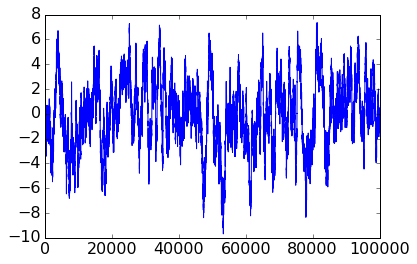

In [3]:
plt.plot(v_data)

(-20, 20)

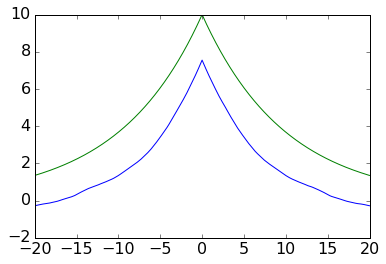

In [4]:
tau = np.linspace(-len(v_data)*dt, len(v_data)*dt, 2*len(v_data)-1)
plt.plot(tau, np.correlate(v_data, v_data, mode='full')/len(v_data))
plt.plot(tau, np.exp(-gamma*np.abs(tau))/gamma)
plt.xlim(-20, 20)

(-20, 20)

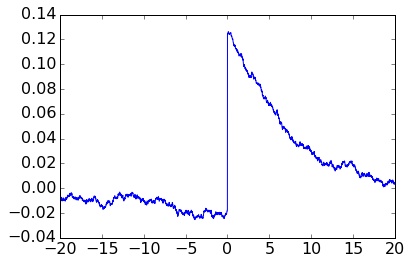

In [5]:
plt.plot(tau, np.correlate(v_data, F_data, mode='full')/len(v_data))
plt.xlim(-20, 20)

## Langevin equation with colored noise

The noise is defined by its autocorrelation
$$\langle F(\tau) F \rangle = 2 D m^2 \omega_c e^{-\omega_c |\tau|}$$
and the Langevin equation is
$$\dot v = - \gamma v + F$$

In [6]:
# Langevin equation with colored noise

v = 0
F = 0
dt = 0.01 ; N_steps = 10000
gamma = 2
wc = 1
D = 1
v_factor = math.sqrt(2*D*wc)*dt
F_factor = math.sqrt(2*dt)
F_data = []
v_data = []
for t in range(N_steps):
    F = F*(1-wc*dt) + F_factor*random.gauss(0,1)
    v = v*(1-gamma*dt) + v_factor*F
    F_data.append(F)
    v_data.append(v)
time = np.arange(N_steps)*dt
F_data = np.array(F_data)
v_data = np.array(v_data)

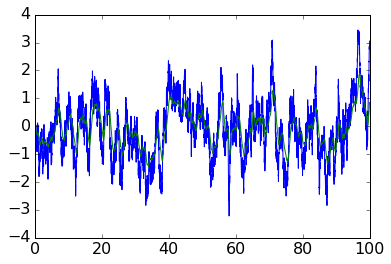

In [7]:
plt.plot(time, F_data)
plt.plot(time, v_data)

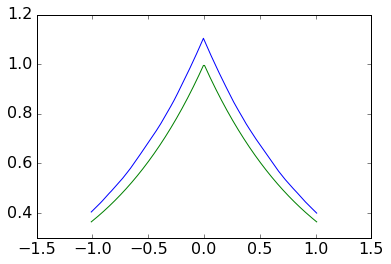

In [8]:
n = len(F_data)
C_F = np.correlate(F_data, F_data, mode='full')/n
n_points = 101
tau = np.linspace(-n_points*dt, n_points*dt, 2*n_points)
plt.plot(tau, C_F[n-n_points:n+n_points])
plt.plot(tau, np.exp(-wc*np.abs(tau))/wc)

In [9]:
def vv(tau):
    pref = 2*D*wc
    t1 = 1/(2*gamma)*(1/(gamma+wc)-1/(gamma-wc))*np.exp(-gamma*np.abs(tau))
    t2 = 1/(gamma-wc)/(gamma+wc)*np.exp(-wc*np.abs(tau))
    return pref*(t1+t2)

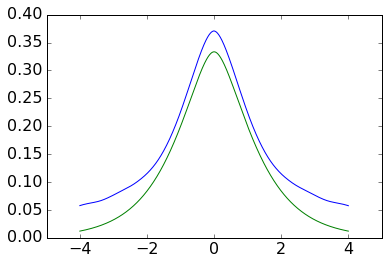

In [10]:
n = len(v_data)
C_v = np.correlate(v_data, v_data, mode='full')/n
n_points = 401
tau = np.linspace(-n_points*dt, n_points*dt, 2*n_points)
plt.plot(tau, C_v[n-n_points:n+n_points])
plt.plot(tau, vv(np.abs(tau)))

## On white noise

To generate white noise, one use a random number generator with the
*normal* (i.e. gaussian distributed) distribution. Below, I show its
autocorrelation that should resemble a Dirac, have zero average and
standard deviation 1.

Average 0.00599770905559
Standard deviation 0.999392388272


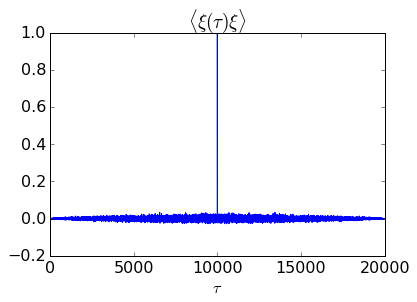

In [11]:
data = np.random.normal(size=10000)

print('Average', np.mean(data))
print('Standard deviation', np.std(data))
plt.plot(np.correlate(data, data, mode='full') / len(data))
plt.title(r'$\langle \xi(\tau) \xi\rangle$')
plt.xlabel(r'$\tau$');